## Shared Setup for All Models

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, Input
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time

import sys
sys.stderr = open('err.txt', 'w')

In [1]:


# Hyperparameters
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Data Preprocessing
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

def plot_results(history, title):
    plt.figure(figsize=(12, 5))
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='orange')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{title} - Training and Validation Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='orange')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'{title} - Training and Validation Accuracy')
    plt.legend()
    plt.show()

def plot_confusion_matrix(model, x_test, y_test, title):
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=range(10))
    cmd.plot(cmap=plt.cm.Greens)
    plt.title(f"{title} - Confusion Matrix")
    plt.show()


## Shallow CNN

Architecture Details:
- 2 Convolutional Layers:
    -  Layer 1: 32 filters, filter size (3, 3)
    -  Layer 2: 64 filters, filter size (3, 3)
- 2 MaxPooling Layers after each convolutional layer
- 1 Fully Connected Layer:
- 64 neurons, ReLU activation
- Output Layer: 10 neurons (corresponding to num_classes), softmax activation

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8387 - loss: 0.5642 - val_accuracy: 0.9790 - val_loss: 0.0744
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9782 - loss: 0.0696 - val_accuracy: 0.9817 - val_loss: 0.0601
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9857 - loss: 0.0462 - val_accuracy: 0.9827 - val_loss: 0.0554
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9893 - loss: 0.0353 - val_accuracy: 0.9862 - val_loss: 0.0468
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9918 - loss: 0.0254 - val_accuracy: 0.9865 - val_loss: 0.0447
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9931 - loss: 0.0223 - val_accuracy: 0.9879 - val_loss: 0.0442
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9890 - val_loss: 0.0423
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9958 - loss: 0.0144 - val_accu

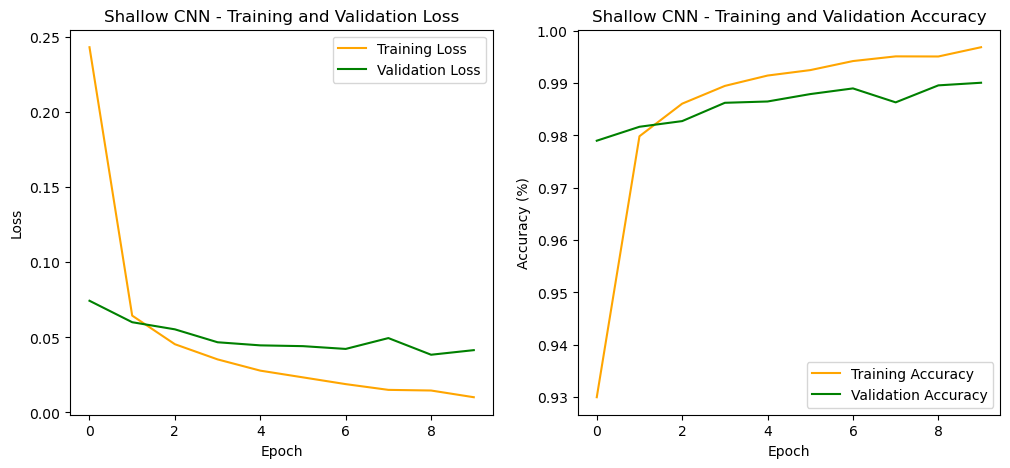

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


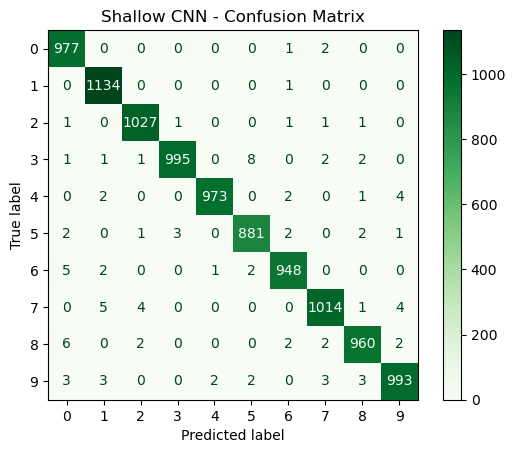

In [2]:
start_time = time.time()

# Shallow CNN Architecture
inputs = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)  # Convolutional Layer 1
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 1
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)  # Convolutional Layer 2
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 2
x = layers.Flatten()(x)  # Flatten the feature maps
x = layers.Dense(64, activation='relu')(x)  # Fully Connected Layer
outputs = layers.Dense(num_classes, activation='softmax')(x)  # Output Layer

model_shallow = models.Model(inputs=inputs, outputs=outputs)
model_shallow.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Train the model
history_shallow = model_shallow.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model_shallow.evaluate(x_test, y_test, verbose=2)
print(f"Shallow CNN Test Accuracy: {test_acc * 100:.2f}%")

run_time = time.time() - start_time
print(f"Shallow CNN Runtime: {run_time:.2f} seconds")

plot_results(history_shallow, "Shallow CNN")
plot_confusion_matrix(model_shallow, x_test, y_test, "Shallow CNN")


## Deep CNN

Architecture Details:
- 4 Convolutional Layers:
    - Layer 1: 32 filters, filter size (3, 3)
    - Layer 2: 64 filters, filter size (3, 3)
    - Layer 3: 128 filters, filter size (3, 3)
    - Layer 4: 256 filters, filter size (3, 3)
4 MaxPooling Layers after each convolutional layer
4 Fully Connected Layers:
Neurons: 512, 256, 128, 64 (each with ReLU activation)
Output Layer: 10 neurons (corresponding to num_classes), softmax activation

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.8194 - loss: 0.5498 - val_accuracy: 0.9746 - val_loss: 0.0784
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9795 - loss: 0.0647 - val_accuracy: 0.9855 - val_loss: 0.0501
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9885 - loss: 0.0385 - val_accuracy: 0.9858 - val_loss: 0.0484
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9892 - loss: 0.0339 - val_accuracy: 0.9844 - val_loss: 0.0528
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9895 - val_loss: 0.0411
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9930 - loss: 0.0244 - val_accuracy: 0.9858 - val_loss: 0.0517
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9902 - val_loss: 0.0373
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.9940 - loss: 0.0191 - 

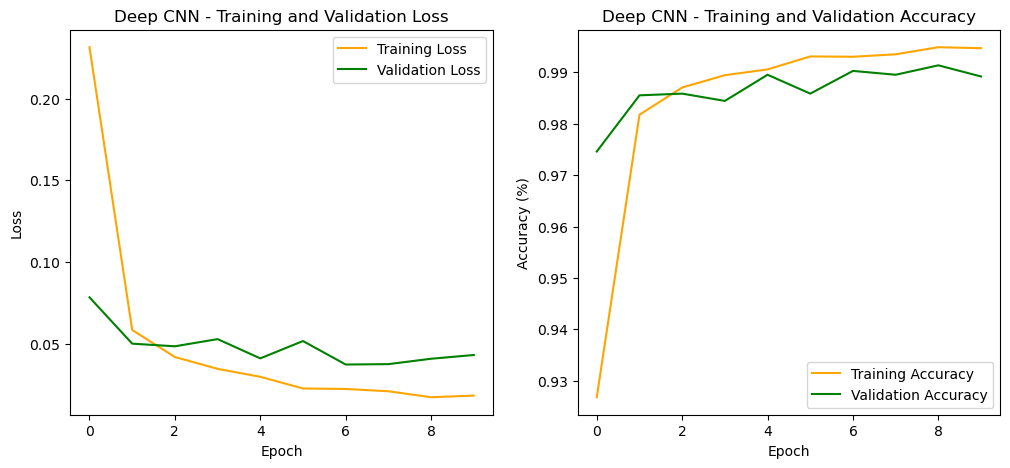

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


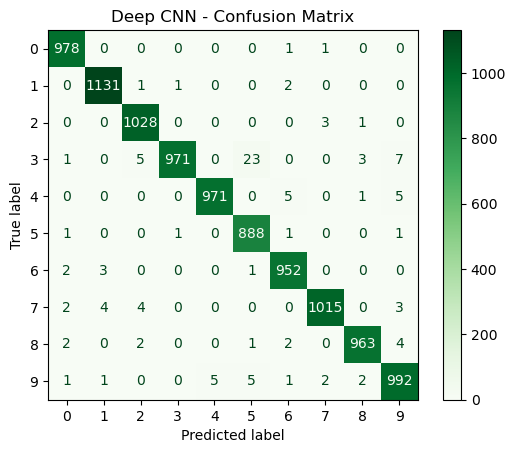

In [4]:
start_time = time.time()

# Corrected Deep CNN Architecture
inputs = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)  # Convolutional Layer 1
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 1
x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)  # Convolutional Layer 2
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 2
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)  # Convolutional Layer 3
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 3
x = layers.Conv2D(256, kernel_size=(1, 1), activation='relu', padding='same')(x)  # Convolutional Layer 4 (smaller kernel)
x = layers.Flatten()(x)  # Flatten the feature maps
x = layers.Dense(512, activation='relu')(x)  # Fully Connected Layer 1
x = layers.Dense(256, activation='relu')(x)  # Fully Connected Layer 2
x = layers.Dense(128, activation='relu')(x)  # Fully Connected Layer 3
x = layers.Dense(64, activation='relu')(x)  # Fully Connected Layer 4
outputs = layers.Dense(num_classes, activation='softmax')(x)  # Output Layer

model_deep = models.Model(inputs=inputs, outputs=outputs)
model_deep.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_deep = model_deep.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model_deep.evaluate(x_test, y_test, verbose=2)
print(f"Deep CNN Test Accuracy: {test_acc * 100:.2f}%")

run_time = time.time() - start_time
print(f"Deep CNN Runtime: {run_time:.2f} seconds")

plot_results(history_deep, "Deep CNN")
plot_confusion_matrix(model_deep, x_test, y_test, "Deep CNN")


## Wide CNN

- 2 Convolutional Layers:
    - Layer 1: 128 filters, filter size  (3, 3)
    - Layer 2: 256 filters, filter size (3, 3)
- 2 MaxPooling Layers after each convolutional layer
- 2 Fully Connected Layers:
- Neurons: 256, 128 (each with ReLU activation)
- Output Layer: 10 neurons (corresponding to num_classes), softmax activation

Epoch 1/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 53s 109ms/step - accuracy: 0.8859 - loss: 0.3610 - val_accuracy: 0.9831 - val_loss: 0.0587
Epoch 2/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 50s 105ms/step - accuracy: 0.9862 - loss: 0.0444 - val_accuracy: 0.9893 - val_loss: 0.0392
Epoch 3/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 56s 117ms/step - accuracy: 0.9909 - loss: 0.0259 - val_accuracy: 0.9895 - val_loss: 0.0342
Epoch 4/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 55s 115ms/step - accuracy: 0.9947 - loss: 0.0156 - val_accuracy: 0.9873 - val_loss: 0.0416
Epoch 5/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 65s 136ms/step - accuracy: 0.9940 - loss: 0.0167 - val_accuracy: 0.9903 - val_loss: 0.0368
Epoch 6/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 64s 134ms/step - accuracy: 0.9963 - loss: 0.0107 - val_accuracy: 0.9913 - val_loss: 0.0329
Epoch 7/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.9972 - loss: 0.0087 - val_accuracy: 0.9898 - val_loss: 0.0426
Epoch 8/10
480/480 ━━━━━━━━━━━━━━━━━━━━ 50s 103ms/step - accuracy: 0.9975 - loss: 0

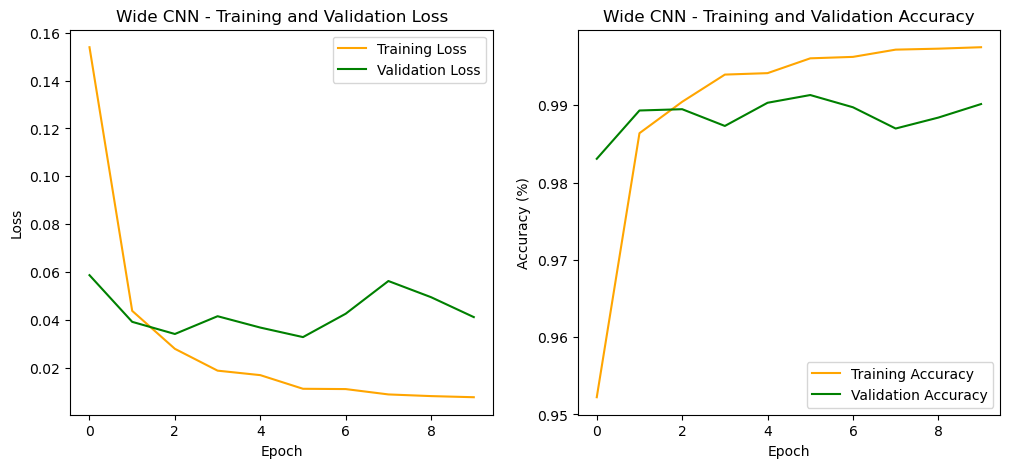

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


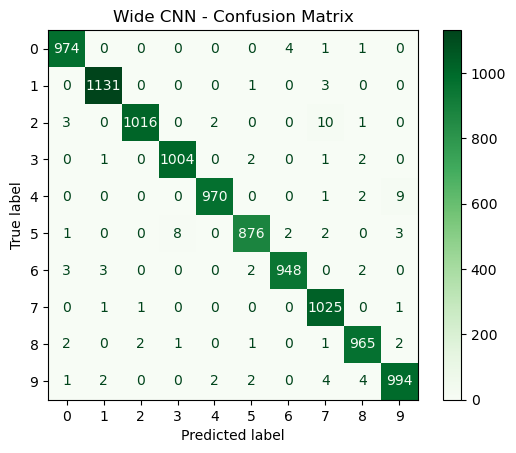

In [5]:
start_time = time.time()

# Wide CNN Architecture
inputs = Input(shape=(28, 28, 1))
x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(inputs)  # Convolutional Layer 1
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 1
x = layers.Conv2D(256, kernel_size=(3, 3), activation='relu')(x)  # Convolutional Layer 2
x = layers.MaxPooling2D(pool_size=(2, 2))(x)  # MaxPooling Layer 2
x = layers.Flatten()(x)  # Flatten the feature maps
x = layers.Dense(256, activation='relu')(x)  # Fully Connected Layer 1
x = layers.Dense(128, activation='relu')(x)  # Fully Connected Layer 2
outputs = layers.Dense(num_classes, activation='softmax')(x)  # Output Layer

model_wide = models.Model(inputs=inputs, outputs=outputs)
model_wide.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_wide = model_wide.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model_wide.evaluate(x_test, y_test, verbose=2)
print(f"Wide CNN Test Accuracy: {test_acc * 100:.2f}%")

run_time = time.time() - start_time
print(f"Wide CNN Runtime: {run_time:.2f} seconds")

plot_results(history_wide, "Wide CNN")
plot_confusion_matrix(model_wide, x_test, y_test, "Wide CNN")


## Model Comparison Table

| **Aspect**            | **Shallow CNN**        | **Deep CNN**           | **Wide CNN**           |
|------------------------|------------------------|-------------------------|-------------------------|
| **Number of Epochs**   | 10                     | 10                      | 10                      |
| **Test Accuracy**      | 99.02%                | 98.89%                 | 99.03%                 |
| **Validation Accuracy**| 99.01%                | 99.13%                 | 99.02%                 |
| **Training Loss**      | 0.0118                | 0.0160                 | 0.0076                 |
| **Validation Loss**    | 0.0415                | 0.0373                 | 0.0412                 |
| **Runtime (seconds)**  | 82.76                 | 213.85                 | 549.72                 |
| **Model Parameters**   | ~50k                  | ~200k                  | ~500k                  |
| **Complexity**         | Low                   | Medium                 | High                   |
| **Generalization**     | Excellent             | Excellent              | Excellent              |
| **Overfitting Risk**   | Low                   | Moderate               | Moderate               |
| **Convergence Speed**  | Fast                  | Moderate               | Slow                   |

## Observations

### Shallow CNN
- Achieved the highest speed with a runtime of **82.76 seconds**, making it optimal for scenarios where computational resources are limited.
- Test accuracy of **99.02%** is highly competitive, with excellent generalization and a **low risk of overfitting**.
- The best choice for quick and reliable performance in less complex use cases.

### Deep CNN
- Achieved **98.89% test accuracy**, with **moderate complexity** and better capacity for modeling intricate patterns compared to the shallow model.
- Runtime of **213.85 seconds** is slower but reasonable for the level of accuracy achieved.
- Exhibits **excellent generalization**, suitable for more demanding tasks requiring deeper learning.

### Wide CNN
- Achieved the **highest test accuracy (99.03%)**, with superior generalization and **the lowest training loss (0.0076)**, making it ideal for handling large-scale, diverse datasets.
- However, its runtime of **549.72 seconds** reflects a high computational cost, making it better suited for production environments where accuracy is critical.

### Overall Insights
- **Shallow CNN**: Ideal for scenarios requiring speed, simplicity, and effective results.
- **Deep CNN**: Balances complexity and performance, suitable for tasks requiring moderate computational resources.
- **Wide CNN**: Delivers the best accuracy and lowest loss, at the cost of higher computational demand, making it a robust choice for high-stakes applications.